In [89]:
import pandas as pd
import numpy as np

In [90]:
train=pd.read_csv(r"C:\Users\wannian\Desktop\5243\train.csv")
test_=pd.read_csv(r"C:\Users\wannian\Desktop\5243\test.csv")

In [91]:
train.head()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [93]:
test_.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


因为test数据标签未给，为让我们预测的数据，所以我们对train data进行分析

In [94]:
test_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [95]:
train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [96]:
train=train.dropna(axis=0)
train.drop_duplicates(inplace=True)
train.index=range(train.shape[0])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [97]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [98]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


我们将原数据进行缺失值处理，重复值处理，异常值处理后，得到了可用于分析的数据，发现label为4分类特征0,1,2,3各500个,为非常均衡的数据，接下来进行特征选择，与模型判断

将label提取出，为y，然后进行训练测试数据划分

In [99]:
y=train.iloc[:,-1]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [15]:
train=train.drop(columns='price_range')

In [16]:
from sklearn.model_selection import train_test_split 

我们观察到，数据均为数值型变量，因此不用进行ordinary encode或者onehot encoder，现在我们观察数据分布

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

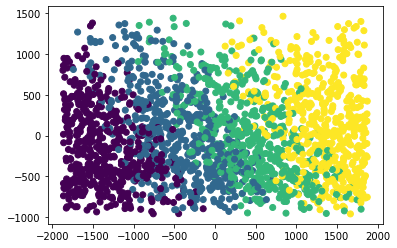

In [18]:
x=PCA(2).fit_transform(train)
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

由上图我们发现，数据是线性可分的，因此除了尝试集成算法外，线性分类算法（svm，logistics）

下面我们对特征进行筛选，将筛选后与未删选的分别代入模型进行准确率的对比

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [39]:
RFC=RFC(n_estimators=100,random_state=0)
train_embedded=SelectFromModel(RFC).fit_transform(train,y)

In [42]:
train_embedded.shape

(2000, 4)

In [43]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(train_embedded,y,test_size=0.3)

In [44]:
clf=clf.fit(xtrain1,ytrain1)
RFC=RFC.fit(xtrain1,ytrain1)

score_c1=clf.score(xtest1,ytest1)
score_r1=RFC.score(xtest1,ytest1)

print("single tree:{}".format(score_c1),
     "random forest:{}".format(score_r1))

single tree:0.8433333333333334 random forest:0.9016666666666666


In [30]:
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.3)
ytrain

1263    0
1420    0
1608    1
1068    0
1226    3
       ..
199     1
604     1
873     0
1831    1
1899    0
Name: price_range, Length: 1400, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score


In [26]:
lrl2=LR(penalty="l2",solver="liblinear",C=0.5,max_iter=1000)

In [45]:
lrl2=lrl2.fit(xtrain,ytrain)
lrl2.coef_

array([[-2.30619876e-03,  1.50272300e-01,  6.48241438e-01,
         2.19360973e-01, -3.21805525e-02,  1.76064680e-01,
         1.53093171e-02,  1.19642430e-01,  2.79606741e-02,
         3.04557881e-01,  6.46320787e-02, -2.16604644e-03,
        -5.39148157e-04, -5.88477704e-03,  1.89138251e-01,
        -5.82270406e-03,  8.16318950e-02,  2.45821654e-01,
         2.60737856e-01,  2.20628438e-01],
       [-3.17189382e-05, -1.03588450e-01, -1.11222126e-01,
         6.88406889e-02,  1.11148723e-02, -8.64698342e-04,
         9.05728400e-04,  1.42019334e-01,  2.09112156e-04,
        -6.04191736e-02, -3.47706157e-03,  2.96266753e-04,
        -1.77357576e-04, -5.32056266e-04,  9.02481330e-03,
        -1.61006456e-02,  1.31586602e-02, -4.52857495e-03,
         2.26608701e-01, -2.11360684e-02],
       [-1.96579392e-04, -5.56314251e-02, -4.35109471e-02,
        -1.18521218e-01,  1.74122689e-02, -1.96405659e-01,
        -6.21363524e-03, -2.19133281e-01,  2.40325618e-03,
         1.80300092e-02, -1.1

In [46]:
accuracy_score(lrl2.predict(xtest),ytest)

0.7533333333333333

In [49]:
lrl3=lrl2.fit(xtrain1,ytrain1)
lrl3.coef_

array([[-1.04431181e-03, -1.42220808e-03,  5.68872641e-06,
        -3.68529420e-03],
       [-9.46264688e-05,  1.54424897e-04, -3.38216077e-05,
        -5.13351374e-04],
       [-3.98380699e-04,  1.87464903e-04, -4.56954778e-04,
         4.26495158e-04],
       [ 8.91652244e-04,  8.01662326e-04,  1.80911551e-04,
         2.41520446e-03]])

In [50]:
accuracy_score(lrl3.predict(xtest1),ytest1)

0.7383333333333333

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf=DecisionTreeClassifier(random_state=0)

clf=clf.fit(xtrain,ytrain)
RFC=RFC.fit(xtrain,ytrain)

score_c=clf.score(xtest,ytest)
score_r=RFC.score(xtest,ytest)

print("single tree:{}".format(score_c),
     "random forest:{}".format(score_r))

single tree:0.82 random forest:0.8666666666666667


In [35]:

rfc_s=cross_val_score(RFC,train,y,cv=10)

In [36]:
rfc_s

array([0.89 , 0.87 , 0.9  , 0.86 , 0.89 , 0.91 , 0.885, 0.865, 0.845,
       0.885])

In [37]:
rfc_s.mean()

0.8800000000000001

In [51]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()


In [116]:
trainc={'data':xtrain,'label':ytrain1}
trainc

{'data':       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 1263            740     0          1.8         0   1       0          12   
 1420            904     0          2.7         1   4       0          19   
 1608           1129     1          0.8         1   9       1          21   
 1068           1095     1          0.5         0   4       0          45   
 1226            603     1          2.5         1   3       0          35   
 ...             ...   ...          ...       ...  ..     ...         ...   
 199            1905     0          0.6         1   9       1          36   
 604            1312     0          0.5         1   0       1          28   
 873             603     1          0.7         1   0       1          64   
 1831            623     1          0.8         0   6       1          26   
 1899           1837     0          0.5         0   9       0          36   
 
       m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  s

In [118]:
testc={'data':xtest,'label':ytest1}
testc

{'data':       battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
 712            1624     0          1.6         1   8       0          28   
 1594            586     1          0.6         0  16       1          42   
 1065           1043     1          0.5         0   7       0          42   
 751            1331     1          1.6         0   0       0          16   
 1293           1702     0          1.0         0   7       0          36   
 ...             ...   ...          ...       ...  ..     ...         ...   
 132             645     0          0.5         0   1       0          41   
 769             891     0          0.5         1   9       1          25   
 958            1008     0          2.5         0   3       0          36   
 1084           1836     0          1.1         1   0       0          14   
 491            1889     0          2.8         0   5       1          31   
 
       m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  s

In [137]:
num_imput=20
num_class=4

In [138]:
from sklearn.preprocessing import OneHotEncoder

result=OneHotEncoder(categories='auto').fit_transform(ytrain.values.reshape(-1,1))

ytrain1=result.toarray()
ytrain1

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [154]:
##def next_batch(train_data, train_target, batch_size):  
  ##  index = [ i for i in range(0,len(train_target)) ]  
    ##np.random.shuffle(index);  
   ### batch_data = []; 
    ##batch_target = [];  
    ##for i in range(0,batch_size):  
      ##  batch_data.append(train_data[index[i]]);  
       ## batch_target.append(train_target[index[i]])  
##    return batch_data, batch_target 

IndentationError: unexpected indent (<ipython-input-154-ed235736b560>, line 2)

In [140]:
##def generate_batch(self):
##    features_placeholder = tf.placeholder(self.features.dtype, self.features.shape)
##    labels_placeholder = tf.placeholder(self.labels.dtype, self.labels.shape)
##    dataset = tf.data.Dataset.from_tensor_slices((self.features, self.labels))
##    dataset = dataset.repeat(100)
##    batched_dataset = dataset.batch(100)
##    iterator = batched_dataset.make_initializable_iterator()
##    batch_xs, batch_ys = iterator.get_next()
##    return iterator.initializer,batch_xs, batch_ys

In [141]:
result1=OneHotEncoder(categories='auto').fit_transform(ytest.values.reshape(-1,1))

ytest1=result1.toarray()
ytest1

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [142]:
x=tf.placeholder(tf.float32,[None,num_imput])
y=tf.placeholder(tf.float32,[None,num_class])

In [143]:

n_neurons={
    1:512,
    2:256,
    3:256,
    4:128
}
weights={
    'h1':tf.Variable(tf.random_normal([num_imput,n_neurons[1]])),
    'h2':tf.Variable(tf.random_normal([n_neurons[1],n_neurons[2]])),
    'h3':tf.Variable(tf.random_normal([n_neurons[2],n_neurons[3]])),
    'h4':tf.Variable(tf.random_normal([n_neurons[3],n_neurons[4]])),
}
biases={
    'b1':tf.Variable(tf.random_normal([n_neurons[1]])),
    'b2':tf.Variable(tf.random_normal([n_neurons[2]])),
    'b3':tf.Variable(tf.random_normal([n_neurons[3]])),
    'b4':tf.Variable(tf.random_normal([n_neurons[4]])),
    'out':tf.Variable(tf.random_normal([num_class])),
}


In [144]:
learning_rate=0.01
num_steps=3000
batch_size=50
display_step=100


In [148]:
def evaluate(logits):
    prediction=tf.nn.softmax(logits)
    cost_function=tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=y))
    
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
    train_op=optimizer.minimize(cost_function)
    
    
    correct_pred=tf.equal(tf.argmax(prediction,1),tf.argmax(y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(1,num_steps):
            batch_x,batch_y=xtrain,ytrain1
            sess.run(train_op,feed_dict={x:batch_x,y:batch_y})
            if(step%display_step==0 or step==1):
                loss,acc=sess.run([cost_function,accuracy],
                                  feed_dict={x:batch_x,y:batch_y}
                )
                print('step'+str(step)\
                +',loss='+'{:.4f}'.format(loss)\
                +',Training accuracy='+'{:.3f}'.format(acc))
        print("optimization finished!!!!")
        
        print("testing accuracy:",\
             sess.run(accuracy,feed_dict={x:xtest,
                                         y:ytest1}))

In [149]:
def neural_net(x,n_layer):
    print("--------vanilla NN with {0} layers".format(n_layer))
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    hidden_layers={
        1:layer_1,
        2:layer_2,
        3:layer_3,
        4:layer_4
    }
    out_weight=tf.Variable(tf.random_normal([n_neurons[n_layer],num_class]))
    out_layer=tf.matmul(hidden_layers[n_layer],out_weight)+biases['out']
    return out_layer

In [150]:
evaluate(neural_net(x,4))

--------vanilla NN with 4 layers
step1,loss=603423488.0000,Training accuracy=0.254
step100,loss=18374170.0000,Training accuracy=0.545
step200,loss=2782928.7500,Training accuracy=0.613
step300,loss=1890129.2500,Training accuracy=0.618
step400,loss=1321193.0000,Training accuracy=0.579
step500,loss=1079764.6250,Training accuracy=0.600
step600,loss=839292.8750,Training accuracy=0.563
step700,loss=845149.8125,Training accuracy=0.583
step800,loss=553842.3125,Training accuracy=0.566
step900,loss=355896.7188,Training accuracy=0.661
step1000,loss=428584.7188,Training accuracy=0.614
step1100,loss=156746.5156,Training accuracy=0.687
step1200,loss=195476.2969,Training accuracy=0.673
step1300,loss=308134.2500,Training accuracy=0.640
step1400,loss=123685.1328,Training accuracy=0.680
step1500,loss=144849.6875,Training accuracy=0.674
step1600,loss=194594.0625,Training accuracy=0.631
step1700,loss=119888.4453,Training accuracy=0.629
step1800,loss=78849.5625,Training accuracy=0.685
step1900,loss=144444.

In [151]:
def neural_net_relu(x,n_layer):
    
    print("--------vanilla NN + RELU with {0} layers".format(n_layer))
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    relu_1=tf.nn.relu(layer_1)
    
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    relu_2=tf.nn.relu(layer_2)
    
    layer_3=tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    relu_3=tf.nn.relu(layer_3)
    
    layer_4=tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    hidden_layers={
        1:layer_1,
        2:layer_2,
        3:layer_3,
        4:layer_4
    }
    out_weight=tf.Variable(tf.random_normal([n_neurons[n_layer],num_class]))
    out_layer=tf.matmul(hidden_layers[n_layer],out_weight)+biases['out']
    return out_layer

In [152]:
evaluate(neural_net_relu(x,3))

--------vanilla NN + RELU with 3 layers
step1,loss=21570308.0000,Training accuracy=0.249
step100,loss=1053488.2500,Training accuracy=0.551
step200,loss=387603.1562,Training accuracy=0.615
step300,loss=462059.6875,Training accuracy=0.547
step400,loss=931824.6250,Training accuracy=0.389
step500,loss=220626.7500,Training accuracy=0.615
step600,loss=339120.5312,Training accuracy=0.513
step700,loss=211108.0625,Training accuracy=0.608
step800,loss=144494.9531,Training accuracy=0.553
step900,loss=108053.5781,Training accuracy=0.624
step1000,loss=95483.2422,Training accuracy=0.629
step1100,loss=120313.2109,Training accuracy=0.562
step1200,loss=57405.5781,Training accuracy=0.640
step1300,loss=37385.1406,Training accuracy=0.691
step1400,loss=58808.1367,Training accuracy=0.621
step1500,loss=45757.1562,Training accuracy=0.582
step1600,loss=35913.9414,Training accuracy=0.660
step1700,loss=37192.6172,Training accuracy=0.584
step1800,loss=27436.3750,Training accuracy=0.656
step1900,loss=26313.3262,Tr

In [153]:
evaluate(neural_net_relu(x,2))

--------vanilla NN + RELU with 2 layers
step1,loss=645608.0000,Training accuracy=0.356
step100,loss=54041.4219,Training accuracy=0.536
step200,loss=24549.9707,Training accuracy=0.601
step300,loss=26692.0801,Training accuracy=0.626
step400,loss=168032.0938,Training accuracy=0.558
step500,loss=37863.0703,Training accuracy=0.562
step600,loss=25533.3164,Training accuracy=0.603
step700,loss=58800.8008,Training accuracy=0.507
step800,loss=15036.0342,Training accuracy=0.662
step900,loss=13926.8799,Training accuracy=0.690
step1000,loss=28245.5664,Training accuracy=0.638
step1100,loss=20332.0176,Training accuracy=0.671
step1200,loss=10378.0586,Training accuracy=0.701
step1300,loss=11559.9297,Training accuracy=0.682
step1400,loss=11865.9258,Training accuracy=0.679
step1500,loss=24589.2969,Training accuracy=0.591
step1600,loss=25835.3145,Training accuracy=0.592
step1700,loss=16754.4102,Training accuracy=0.670
step1800,loss=26252.0938,Training accuracy=0.592
step1900,loss=23517.8262,Training accur